<a href="https://colab.research.google.com/github/bluepeach1121/Pytorch_tutorials/blob/main/learning_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

* reference: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. computer vision libraries

* `torchvision` -- base domain for computer vision models
* `torchvision.datasets` -- get datasets and data loading functions for computer vision.
* `torchvision.models` -- get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` -- functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.DataLoader` -- creates a python iterable over a dataset


In [71]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


##1. getting a dataset (from MNIST)
the dataset we'll be using if fashionMNIST from torchvision.datasets -
https://pytorch.org/vision/0.18/generated/torchvision.datasets.FashionMNIST.html


In [72]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), #onvert a PIL Image or ndarray to tensor and scale the values accordingly.
    target_transform=None # how do we want to transfrom the labels/targets
    )

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [73]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data[0]

In [ ]:
# see the first training example
image, label = train_data[0]
image, label

In [76]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [77]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [78]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [79]:
print(f'image shape: {image.shape} -> [color-channels, height, width]')
print(f'image label: {class_names[label]}')

image shape: torch.Size([1, 28, 28]) -> [color-channels, height, width]
image label: Ankle boot


### 1.2 visualize our data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

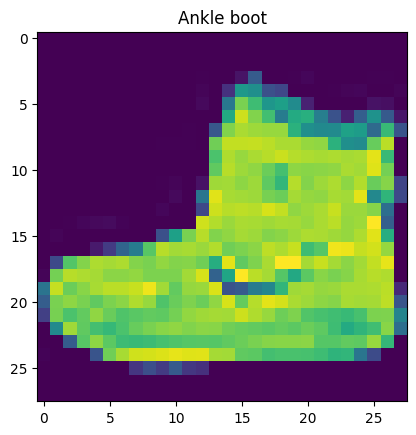

In [80]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'image shape: {image.shape}' )
plt.imshow(image.squeeze())
plt.title(class_names[label])
#image

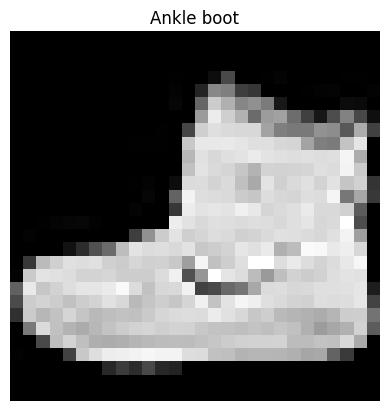

In [81]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

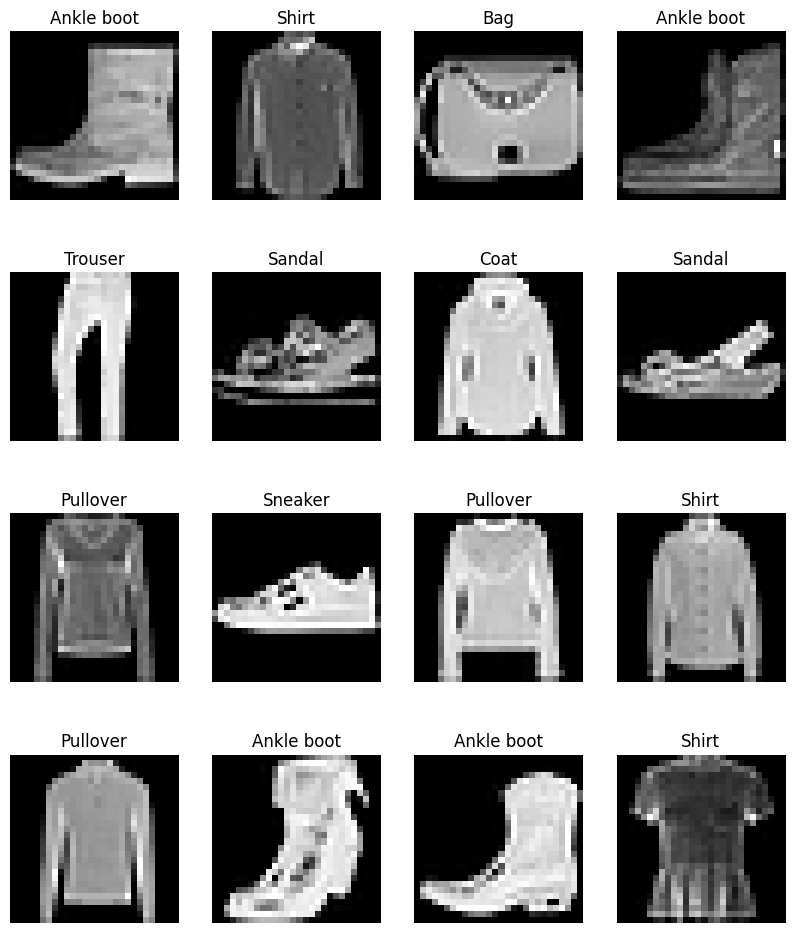

In [82]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(10,12))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);
    #print(random_idx)

## 2. prepare dataloader

right now, our data is in form of Pytorch Datasets.
DataLoader turns our dataset into a Python iterable

More specifically, wa want to turn our data into batches (or mini-batches)

we do this because:

1. it is more computationally efficient, as in, your computing hardware maynot be able to look at 60000 images in one hit. so we break it down to 32 images at a time.
2. it gives the NN (neural network) more chances to updates its gradients per epoch

In [83]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into batches (iterables)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b0a0b8a1510>,
 <torch.utils.data.dataloader.DataLoader at 0x7b0aebb3fdc0>)

In [84]:
#let's check out what's we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}....')
print(f'length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}.....')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b0a0b8a1510>, <torch.utils.data.dataloader.DataLoader object at 0x7b0aebb3fdc0>)
length of train_dataloader: 1875 batches of 32....
length of test_dataloader: 313 batches of 32.....


In [ ]:
 next(iter(train_dataloader))

In [86]:
#check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [87]:
len(train_features_batch)


32

image size: torch.Size([1, 28, 28])
label: 4, label size: torch.Size([])


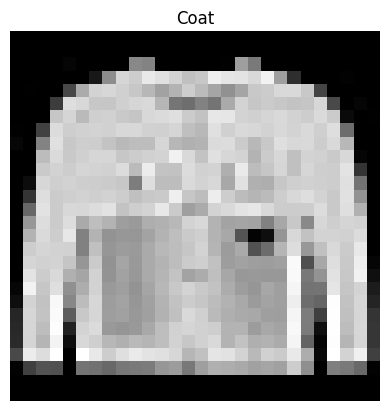

In [88]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'image size: {img.shape}')
print(f'label: {label}, label size: {label.shape}')


##3. model 0: Building a baseline model
when starting to build a series of series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon subsequent models/experiments.
In other words: start simply and add complexity when necessary

In [89]:
# create a flatten layer
flatten_model =nn.Flatten()

#get a single sample
x = train_features_batch[0]
output = flatten_model(x) # perform a forward pass

# print out what happened
print(f'shape b4 flattening: {x.shape} -> color_channels, height, width]')
print(f'shape after flattening: {output.shape} -> [color_channels, height*width]')

shape b4 flattening: torch.Size([1, 28, 28]) -> color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
output.squeeze()

In [91]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [92]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 784, # 784 is 28*28*1..
    hidden_units= 10, # how many units in the hidden layers
    output_shape=len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [93]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

### 3.1 setup loss, optimizer and evaluation metrics

* loss function - since we're working with multiclass data, our loss function will be `nn.CrossEntropyLoss`

* Optimzer - our optimizer `torch.optim.Adam()`
* evaluation metrix - since we're working on a classification problem, lets use accuracy as our evaluation metric

In [95]:
import requests
from pathlib import Path as path

#download helper functions from learn pytorch repo
if path('helper_function.py').is_file():
    print('helper_function.py already exists, skipping download....')
else:
    print('downloading helper_function.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

downloading helper_function.py


In [96]:
#import accuracy metric
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                             lr=0.01,
                             )

# 3.2. creating a function to time our experiments

machine learning is very experimental.

two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [97]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device =None):
    """prints differences between start and end time."""
    total_time = end - start
    print(f'Train time on {device}: {total_time: .3f} seconds')
    return total_time

In [98]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu:  0.000 seconds


7.198899993454688e-05

### 3.3 creating a training loop and training a model on batches of data

1. loop through epochs.
2. loop through training batches, perform training steps, calculate the train loss **per batch**
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happening
5. time it all (for fun).

In [99]:
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [100]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs (we'll keep this small for faster training time)
epochs = 3

#create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch + 1} \n-----')
    ###training
    train_loss = 0
    # add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. forward pass
        y_pred = model_0(X)

        #2. calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() #accumulates train loss

        #3. optimizer zero grad
        optimizer.zero_grad()

        #4. loss backward
        loss.backward()

        #5 optimizer step
        optimizer.step()

        #print out what's happening
        if batch % 400 == 0:
            print(f'went over {batch * len(X)}/{len(train_dataloader.dataset)} samples')

        # divide total train loss by length of train dataloader
        train_loss /= len(train_dataloader)

    ###testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #1. forward pass
            test_pred = model_0(X_test)

            #2. calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            #3. calculate accurately (accumulatively)
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))

        #calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        #calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    #print out whats happening
    print(f'\nTrain loss: {train_loss: .4f} | Testloss: {test_loss: .4f}, Test_acc: {test_acc: .4f}')

#calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu,
                                                    end=train_time_end_on_cpu,
                                                    device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1 
-----
went over 0/60000 samples
went over 12800/60000 samples
went over 25600/60000 samples
went over 38400/60000 samples
went over 51200/60000 samples

Train loss:  0.0002 | Testloss:  0.6290, Test_acc:  78.6342
epoch: 2 
-----
went over 0/60000 samples
went over 12800/60000 samples
went over 25600/60000 samples
went over 38400/60000 samples
went over 51200/60000 samples

Train loss:  0.0003 | Testloss:  0.5441, Test_acc:  81.1302
epoch: 3 
-----
went over 0/60000 samples
went over 12800/60000 samples
went over 25600/60000 samples
went over 38400/60000 samples
went over 51200/60000 samples

Train loss:  0.0002 | Testloss:  0.5137, Test_acc:  81.9988
Train time on cpu:  66.265 seconds


## 4. Make predictions and get Model 0 results

In [198]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            accuracy_fn):
    """returns a dictionary containing the results of model predicting on data."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #make our data device agnostic
            X, y = X.to(device), y.to(device)
            #make predictions
            y_pred = model(X)

            # accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__, #only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

#calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

##5. setup device agnostic code (for using GPU if theres one)

In [102]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [103]:
torch.cuda.is_available()

False

In [104]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Model 1. Building a model with non-linearity

we learnt about the power of non-linearity in the last module

In [105]:
#create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [106]:
next(model_0.parameters()).device

device(type='cpu')

In [107]:
#create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) #send to target device


next(model_1.parameters()).device

device(type='cpu')

In [108]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr = 0.01)

### 6.2 functionizing training and evaluation/testing loops.

lets's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [152]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """performs trainin' with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    #put model into training mode
    model.train()

    #add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        #put data on target device
        X, y = X.to(device), y.to(device)

        #1. forward pass
        y_pred = model(X)

        #2. calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) #go from logits -> predcition labels

        #3. optimizer zerp grad
        optimizer.zero_grad()

        #4. loss backward
        loss.backward()

        #5. optimizer step (update the model once per batch)
        optimizer.step()

        #print out whats happening
        if batch % 400 == 0:
            print(f'looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples')

    #divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(data_loader)
    print(f'train loss: {train_loss: .5f} | train acc: {train_acc: .2f}%')



In [153]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """perform a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0

    #put the model in eval mode
    model.eval()

    #turn on inference mode
    with torch.inference_mode():
        for X, y in data_loader:
            #send the data to the target device
            X, y = X.to(device), y.to(device)

            #1. forward pass
            test_pred = model(X)

            #2. calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> predictions

        #adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'test loss {test_loss: .5f} | test acc: {test_acc: 2f}% \n')

In [154]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#set epochs
epochs = 3

#create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch}\n-------------')
    train_step(model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model= model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
-------------
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train loss:  0.65853 | train acc:  75.91%
test loss  0.70321 | test acc:  74.171326% 

epoch: 1
-------------
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train loss:  0.65853 | train acc:  75.91%
test loss  0.70321 | test acc:  74.171326% 

epoch: 2
-------------
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train loss:  0.65852 | train acc:  75.91%
test loss  0.70321 | test acc:  74.171326% 

Train time on cpu:  37.555 seconds


> **Note:** sometimes, depending on your data/hardwarem you might find that your model trains faster on CPU than GPU.
>
> why is this?
>1. it could be that the overhead for copying data/model to and fro from the GPU outweighs the compute benefits offered by the GPU.
> 2. the hard ware you're using has a better CPU in terms of compute capability than the GPU


In [192]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

In [193]:
model_1_results = eval_model(model= model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7032084465026855,
 'model_acc': 74.17132587859425}

##updating eval_model to make it device agnostic

In [200]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            accuracy_fn,
            device: torch.device =device):
    """returns a dictionary containing the results of model predicting on data."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #make our data device agnostic
            X, y = X.to(device), y.to(device)
            #make predictions
            y_pred = model(X)

            # accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__, #only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

## Model 2: building a convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used for processing and analyzing visual data.



In [157]:
#create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            #create a conv layer
            # https://poloclub.github.io/cnn-explainer/
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        #print(f'output shape of conv_block_2: {x.shape}')
        x = self.classifier(x)
        #print(f'output shape of classifier: {x.shape}')
        return x


In [158]:
len(class_names)

10

In [159]:
image.shape

torch.Size([1, 28, 28])

In [160]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

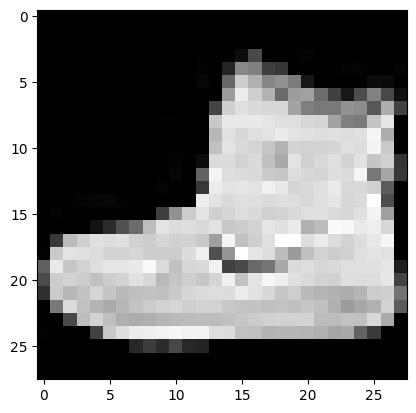

In [161]:
plt.imshow(image.squeeze(), cmap='gray')

In [162]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [163]:
#pass image through model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [164]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor = rand_image_tensor.unsqueeze(0)  # Add batch dimension
output = model_2(rand_image_tensor)
print(f'Output shape of conv_block_1: {output.shape}')


Output shape of conv_block_1: torch.Size([1, 10])


### 7.1 stepping through `nn.Covd2d`

In [ ]:
model_2.state_dict()

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'image batch shape: {images.shape}')
print(f'single image shape: {test_image.shape}')
print(f'test image: \n {test_image}')

In [167]:
test_image.shape

torch.Size([3, 64, 64])

In [168]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image) #or try (test_image.unsqueeze(0))
conv_output.shape

torch.Size([10, 62, 62])

## 7.2 stepping through `nn.MaxPool2d()`

In [169]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [170]:
# print out original image shape without unsqueezed dimension
print(f'test image original shape: {test_image.shape}')
#prin(f'test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}')

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f'shape after going through conv_layer(): {test_image_through_conv.shape}')

#pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'shape after going thru conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

test image original shape: torch.Size([3, 64, 64])
shape after going through conv_layer(): torch.Size([10, 62, 62])
shape after going thru conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [171]:
torch.manual_seed(42)
#create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f'\nrandom tensor: \n {random_tensor}')
print(f'\nrandom tensor shape: \n {random_tensor.shape}')


#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax Pool tensor: \n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

random tensor shape: 
 torch.Size([1, 1, 2, 2])

Max Pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3. setup a loss and optimizer function for `model_2`


In [172]:
#setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=0.001)


In [ ]:
model_2.state_dict()

In [174]:
### 7.4 training and testing `model_2` using our training and test functions

In [183]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch}\n``````````````````')
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/1 [00:00<?, ?it/s]

epoch: 0
``````````````````
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train loss:  0.26053 | train acc:  90.47%
test loss  0.29536 | test acc:  89.506789% 

Train time on cpu:  60.861 seconds


In [203]:
# get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.29535549879074097,
 'model_acc': 89.5067891373802}

In [204]:
## 8. Compare model results and training time

In [205]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.513675,81.998802
1,FashionMNISTModelV1,0.703208,74.171326
2,FashionMNISTModelV2,0.295355,89.506789


In [206]:
# add training time to results comparison
compare_results['training time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTModelV0,0.513675,81.998802,66.265286
1,FashionMNISTModelV1,0.703208,74.171326,37.555185
2,FashionMNISTModelV2,0.295355,89.506789,60.860759


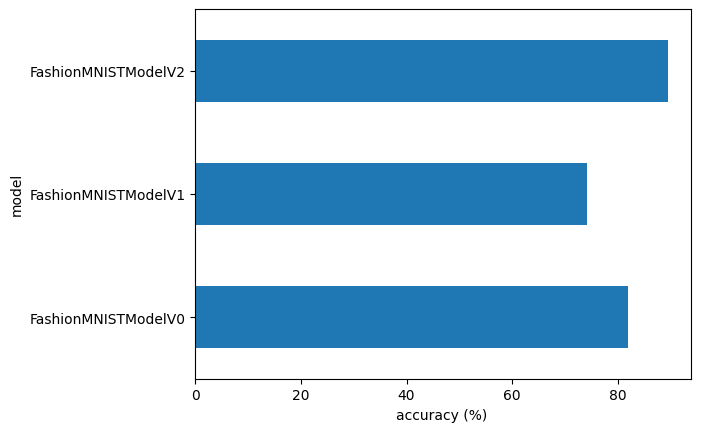

In [207]:
# visualize model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%) ")
plt.ylabel('model');

## 9. make and evaluate random predictions with best model

In [225]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #forward pass (model outputs raw logits)
            pred_logit = model(sample)

            #get prediction probability (logit -> prediction probabilty)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            #get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    #stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)



In [250]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

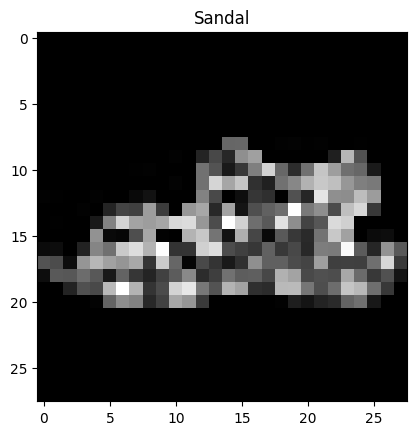

In [251]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [252]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#view first 2 prediction probabilites
pred_probs[:2]

tensor([[1.8128e-06, 2.5248e-10, 8.8299e-08, 3.1599e-09, 3.7722e-08, 9.9940e-01,
         2.0460e-06, 7.1638e-05, 8.3607e-05, 4.4460e-04],
        [4.4874e-04, 2.8121e-06, 5.9059e-02, 4.9023e-05, 1.3541e-02, 2.5511e-09,
         9.2690e-01, 1.6722e-10, 1.5009e-07, 3.4472e-08]])

In [253]:
test_labels

[5, 6, 6, 4, 3, 1, 4, 6, 6]

In [254]:
#convert predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 6, 3, 1, 4, 3, 6])

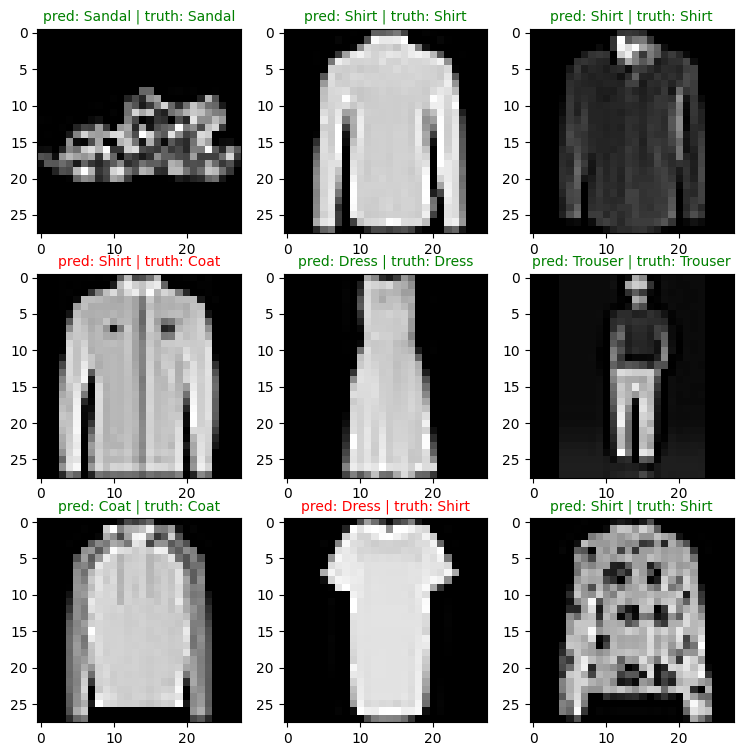

In [255]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    #create subplot
    plt.subplot(nrows, ncols, i+1)

    #plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    #find the prediction (in text form, e.g 'sandal')
    pred_label = class_names[pred_classes[i]]

    #get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    #create a title for the plot
    title_text = f'pred: {pred_label} | truth: {truth_label}'

    #check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') #green txt if prediction's same as truth label
    else:
        plt.title(title_text, fontsize=10, c='r')

    #plt.axis(False);

## 10. making a confusion matrix for further prediction evaluation
A confusion matrix is a fantastic way of evaluting your classification problem.

https://pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html

1. make predictions with our trained model on the test dataset
2. make a confusion matrix `torchmetrics.CounfusionMatrix`
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [262]:
import mlxtend
from tqdm.auto import tqdm

#1. make predictions with trained data
y_preds =[]
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='making prediction....'):
        #send the data and targets to target device
        X, y = X.to(device), y.to(device)
        #do the forward pass
        y_logit = model_2(X)
        #turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

making prediction....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [263]:
len(y_pred_tensor)

10000

In [267]:
#check if needed packages are installed, if not install them.
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be ==19 or higher'
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.1 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [270]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

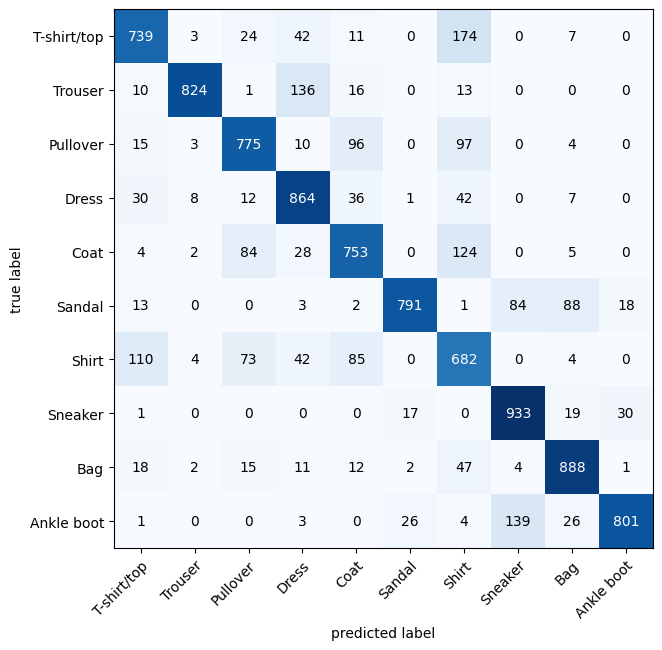

In [276]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

##11. save and load best perfoming model

In [278]:
from pathlib import Path as path

#create model directory path
MODEL_PATH = path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#create model save
MODEL_NAME = '03_pytorch_computervision_model2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/03_pytorch_computervision_model2.pth


In [279]:
test_image.shape

torch.Size([3, 64, 64])

In [281]:
#create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

#load in the save state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [282]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.29535549879074097,
 'model_acc': 89.5067891373802}

In [283]:
#evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model= loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.29535549879074097,
 'model_acc': 89.5067891373802}

In [286]:
# check if model results are close to one another
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-05)


tensor(True)